In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

train=pd.read_csv("train.csv")
train['Gender']=train.Gender.map({'Male':0,'Female':1})
train['Vehicle_Age']=train.Vehicle_Age.map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
train['Vehicle_Damage']=train.Vehicle_Damage.map({'No':0,'Yes':1})
print(train)
train.isnull().any()


            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            0       0   27              1.0         46.0                   1   
1            1       1   44              1.0         28.0                   0   
2            2       0   52              1.0         46.0                   0   
3            3       0   23              1.0         46.0                   1   
4            4       1   43              1.0         28.0                   0   
...        ...     ...  ...              ...          ...                 ...   
304883  304883       1   20              1.0          7.0                   0   
304884  304884       1   24              1.0         20.0                   0   
304885  304885       1   25              1.0         36.0                   1   
304886  304886       0   22              1.0          8.0                   1   
304887  304887       1   26              1.0         28.0                   1   

        Vehicle_Age  Vehicl

id                      False
Gender                  False
Age                     False
Driving_License          True
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel     True
Vintage                 False
Response                False
dtype: bool

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            0       0   27              1.0         46.0                   1   
1            1       1   44              1.0         28.0                   0   
2            2       0   52              1.0         46.0                   0   
3            3       0   23              1.0         46.0                   1   
4            4       1   43              1.0         28.0                   0   
...        ...     ...  ...              ...          ...                 ...   
304883  304883       1   20              1.0          7.0                   0   
304884  304884       1   24              1.0         20.0                   0   
304885  304885       1   25              1.0         36.0                   1   
304886  304886       0   22              1.0          8.0                   1   
304887  304887       1   26              1.0         28.0                   1   

        Vehicle_Age  Vehicl

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

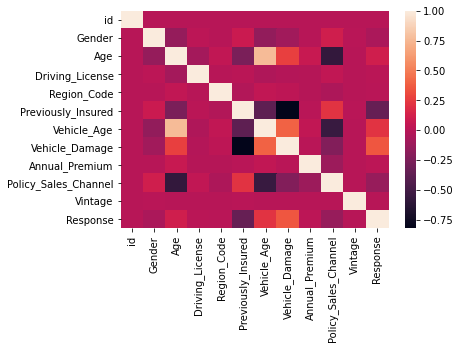

In [56]:
imputer=KNNImputer(n_neighbors=2)
a=imputer.fit_transform(train[['Driving_License']])
b=imputer.fit_transform(train[['Policy_Sales_Channel']])
train['Driving_License']=a
train['Policy_Sales_Channel']=b
#KNN算法填充缺失值
print(train)
corr=train.corr()
corr=(corr)
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr

train.isnull().any()

In [124]:
x=train.loc[:,'Age':'Vintage']
print(x)
y=train.loc[:,'Response']
print(y)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

        Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0        27              1.0         46.0                   1            0   
1        44              1.0         28.0                   0            2   
2        52              1.0         46.0                   0            2   
3        23              1.0         46.0                   1            0   
4        43              1.0         28.0                   0            1   
...     ...              ...          ...                 ...          ...   
304883   20              1.0          7.0                   0            0   
304884   24              1.0         20.0                   0            0   
304885   25              1.0         36.0                   1            0   
304886   22              1.0          8.0                   1            0   
304887   26              1.0         28.0                   1            0   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  V

In [132]:
#CLF=RandomForestClassifier(n_estimators=500,n_jobs=4)
#CLF=MLPClassifier(hidden_layer_sizes=(1000), max_iter=100)
#CLF=XGBClassifier(silent=0,learning_rate=0.01,max_depth=4,gamma = 0.1,n_estimators=1500)
CLF=lgb.LGBMClassifier(n_jobs=-1,
                        num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=1500)
CLF.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.05, n_estimators=1500, num_leaves=64)

In [126]:
test=pd.read_csv("test.csv")
test['Gender']=test.Gender.map({'Male':0,'Female':1})
test['Vehicle_Age']=test.Vehicle_Age.map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Vehicle_Damage']=test.Vehicle_Damage.map({'No':0,'Yes':1})

In [127]:
test_imputer=KNNImputer(n_neighbors=2)
a=test_imputer.fit_transform(test[['Driving_License']])
b=test_imputer.fit_transform(test[['Policy_Sales_Channel']])
test['Driving_License']=a
test['Policy_Sales_Channel']=b

In [128]:
#x_test=test.loc[:,'Age':'Vintage']
np.set_printoptions(threshold=np.inf)

<Figure size 432x288 with 0 Axes>

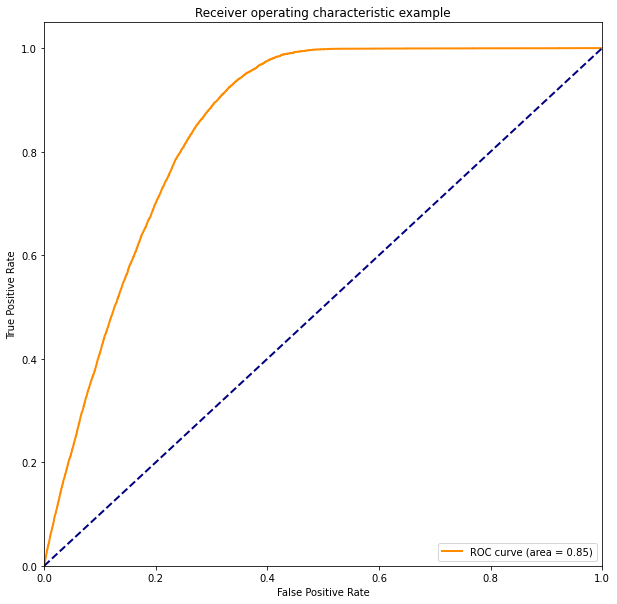

0.8515793818504546


In [133]:
a=CLF.predict_proba(x_test)
scores=a[:,1:2]
fpr,tpr,threshold = roc_curve(y_test, scores)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)